# COVID-19 Accros the World

### Introduction:
The dataset is taken from the John Hopkins COVID-19 database, this database is updated every day for each country and is considered very accurate. This project tries to convert the data from the tabular form to interactive maps and plots to make it easier for the general public to understand the information. To make COVID-19 evolution easier to understand, simple plots are bar and line graphs are used with interaction from which user can change the information represented by the plot on the dashboard. Also, a world map is used where the user can point the mouse pointer to see the total case in that particular country.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import bqplot
import ipywidgets
from ipywidgets import interact
import matplotlib.dates as mdates

from matplotlib import dates as mpl_dates
from datetime import datetime
import warnings
import pycountry
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading CSV Plots

#### This Data set is taken from John Hopkins COVID-19 dataset

In [3]:
csv_df = pd.read_csv("full_data.csv")
csv_df

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
56353,2020-11-11,Zimbabwe,49.0,1.0,8610.0,255.0,200.0,9.0,295.0,13.0
56354,2020-11-12,Zimbabwe,57.0,0.0,8667.0,255.0,240.0,7.0,347.0,13.0
56355,2020-11-13,Zimbabwe,29.0,0.0,8696.0,255.0,252.0,7.0,347.0,13.0
56356,2020-11-14,Zimbabwe,69.0,2.0,8765.0,257.0,294.0,7.0,403.0,15.0


#### This table represents the dataset in the full dataset of all the countries on the horizontal axis with a date starting from 1st January 2020, and the horizontal axis represent new cases, new deaths, total cases, weekly cases, weekly deaths, and biweekly cases biweekly_deaths

### Preprocessing data

In [5]:
death_values= pd.DataFrame(csv_df['total_deaths'].groupby(csv_df['location']).agg('sum')).sort_values(by='total_deaths', ascending=False).reset_index()
death_values.drop(death_values.loc[death_values['location'] == 'World'].index, inplace=True)
cases_values=pd.DataFrame(csv_df['total_cases'].groupby(csv_df['location']).agg('sum')).sort_values(by='total_cases', ascending=False).reset_index()
cases_values.drop(cases_values.loc[cases_values['location'] == 'World'].index, inplace=True)

### Plot 1: Total Deaths and Total Case in whole world

<BarContainer object of 2 artists>

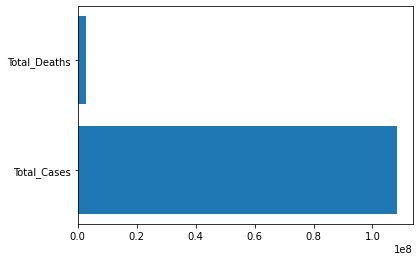

In [6]:
plt.barh(['Total_Cases', 'Total_Deaths'], [csv_df['new_cases'].agg('sum'), csv_df['new_deaths'].agg('sum')] )

This plot shows Total death and case count(Cummulative of all the countries) 

### Plot 2:  Top 20 Countries in terms of COVID-19 Cases

<BarContainer object of 20 artists>

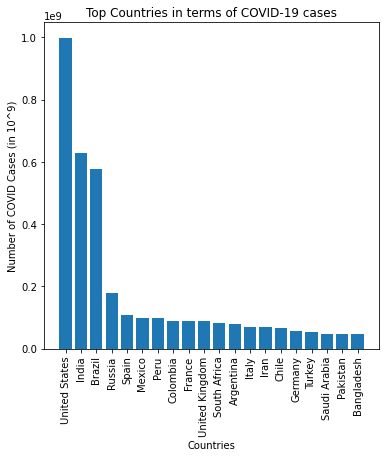

In [17]:
# Plot Top 10 country by Case count
fig, ax1 = plt.subplots(figsize=(6,6))
plt.xticks(rotation=90)
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of COVID Cases (in 10^9)")
ax1.set_title("Top Countries in terms of COVID-19 cases")
ax1.bar(cases_values['location'].head(20), cases_values['total_cases'].head(20))

This plot represents the world's top 20 countries with the most number of COVID-19 cases. In this plot, the USA is at the top of the list followed by India and Brazil. And this is to be noted that after Brazil(3rd place) there is a huge difference in the total number of cases between 3rd and 4th position (Russia). At the end of this spectrum, we have Bangladesh which is closely matched by Pakistan and Saudi Arabia.

### Plot 3: Top 20 Countries in terms of COVID-19 Deaths

<BarContainer object of 20 artists>

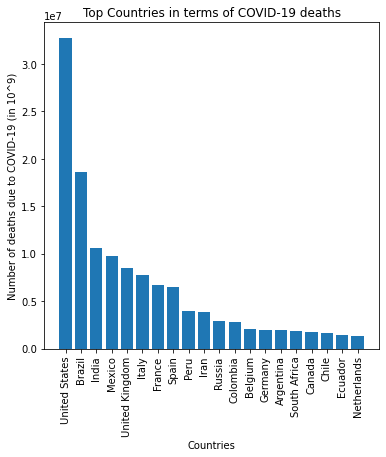

In [8]:
# Plot Top 10 country by Death count
fig, ax2 = plt.subplots(figsize=(6,6))
plt.xticks(rotation=90)
ax2.set_xlabel("Countries")
ax2.set_ylabel("Number of deaths due to COVID-19 (in 10^9)")
ax2.set_title("Top Countries in terms of COVID-19 deaths")
ax2.bar(death_values['location'].head(20), death_values['total_deaths'].head(20))


This plot represents the world's top 20 countries with the most number of deaths due to COVID-19. In this plot also the USA is at the top of the chart followed by Brazil and India. And this is to be noted that after Brazil(2nd place) there is a huge difference in the total number of cases between 2nd and 3rd position (India). At the end of this spectrum, we have the Netherlands.

### Plot 4 : COVID-19 propogation (Death/Cases) for selected country

In [9]:
# Countries vs total_cases timeline
@ipywidgets.interact(country=csv_df['location'].unique())
    
def plot_fuc(country, yAxis= list(['total_cases', 'total_deaths'])):
    fig, ax3 = plt.subplots(figsize=(10,10))
    xAxis = csv_df['date'].loc[csv_df['location'] == country]
    xAxis=pd.to_datetime(xAxis)

    ax3.plot(xAxis, csv_df[yAxis].loc[csv_df['location'] == country].fillna(0))
    ax3.set_xlabel('Date of record')
    ax3.set_ylabel('Count')
    ax3.set_title('COVID-19 propogation (Death/Cases)')
#     plt.xticks()
    ax3.autoscale(enable=True, axis='x', tight=False)
    plt.show()

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

This plot is interactive, this plot can represent the total case and death propagation(by date) for the selected country.
The is a line plot that represents the propagation of the pandemic in a selected country. The steepness of the line refers to the increase in the total cases or deaths. A flat line suggests less or no total cases or deaths.

### Plot 5: COVID-19 propogation new Death/Cases for selected country

In [10]:
# Countries vs total_cases timeline
@ipywidgets.interact(country=csv_df['location'].unique())
    
def plot_fuc(country, yAxis= list(['new_cases', 'new_deaths'])):
    fig, ax4 = plt.subplots(figsize=(15,10))
    
    
    xAxis = csv_df['date'].loc[csv_df['location'] == country]
    xAxis=pd.to_datetime(xAxis)
    #ax4
    ax4.plot(xAxis, csv_df[yAxis].loc[csv_df['location'] == country].fillna(0))
    axis =list(xAxis)
    ax4.set_xlabel('Date of record')
    ax4.set_ylabel('Count')
    ax4.set_title('COVID-19 propogation new Death/Cases')
    plt.xticks(rotation=90)
    ax4.autoscale(enable=True, axis='x', tight=True)

    plt.show()

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

This plot is interactive, this plot can represent the daily new case and death propagation(by date) for the selected country. The is a line plot that represents the propagation of the pandemic in a selected country. The spike of a line refers to the increase or decrease in the new cases or deaths on that day. A flat line suggests fewer or no new cases or deaths.

## Dashboard 1

In [16]:
import matplotlib.gridspec as gridspec
@ipywidgets.interact(country=csv_df['location'].unique())
    
def dashboard_function(country, Daily= list(['new_cases', 'new_deaths']), Total= list(['total_cases', 'total_deaths'])):
    
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    specs = gridspec.GridSpec(ncols=2, nrows=4, figure=fig, wspace=0.2 )
    xAxis = csv_df['date'].loc[csv_df['location'] == country]
    xAxis=pd.to_datetime(xAxis) # converting dates to DataTime
    
    fig.suptitle(' COVID-19 Till November ', fontsize=20)
    ax1 = fig.add_subplot(specs[1, 0]) 
    plt.xticks(rotation=90)

    ax2 = fig.add_subplot(specs[1, 1]) 
    plt.xticks(rotation=90)
    
    ax3 = fig.add_subplot(specs[3, 0])
    plt.xticks(rotation=90)
    
    ax4 = fig.add_subplot(specs[3, 1]) 
    plt.xticks(rotation=90)
    
    ax5 = fig.add_subplot(specs[0, :]) 
    ax6 = fig.add_subplot(specs[2, :]) 
    #ax1
    # Plot Top 10 country by Case count
    plt.xticks(rotation=90)
    ax1.set_xlabel("Countries")
    ax1.set_ylabel("Number of COVID Cases")
    ax1.set_title("Top Countries in terms of COVID-19 cases",loc='right')
    ax1.bar(cases_values['location'].head(20), cases_values['total_cases'].head(20))

    #ax2
    ax2.set_xlabel("Countries")
    ax2.set_ylabel("Number of deaths due to COVID-19")
    ax2.set_title("Top Countries in terms of COVID-19 deaths",loc='right')
    ax2.bar(death_values['location'].head(20), death_values['total_deaths'].head(20))

    #ax3
    ax3.plot(xAxis, csv_df[Daily].loc[csv_df['location'] == country].fillna(0))
    ax3.set_xlabel('Date of record')
    ax3.set_ylabel('Count')
    ax3.set_title('Daily New COVID-19 Deaths and Cases')
    
    #ax4
    ax4.plot(xAxis, csv_df[Total].loc[csv_df['location'] == country].fillna(0))
    ax4.set_xlabel('Date of record')
    ax4.set_ylabel('Count')
    ax4.set_title('Total Count of COVID-19 Deaths/Cases')
    
    #ax5
    ax5.barh(['Total_Cases', 'Total_Deaths'], [csv_df['new_cases'].agg('sum'), csv_df['new_deaths'].agg('sum')] )    
    ax5.set_xlabel('Count')
    ax5.set_title('Total Cases and Deaths Due to Covid')
    
    #ax6
    ax6.barh(['Total_Cases', 'Total_Deaths'], [csv_df['new_cases'].loc[csv_df['location']== country].agg('sum'), csv_df['new_deaths'].loc[csv_df['location']== country].agg('sum')] )    
    ax6.set_xlabel('Count')
    ax6.set_title('Total Cases and Deaths Due to Covid in selected country')
    plt.close(fig)
    
    return fig

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

## The above dashboard shows the data about the COVID-19 pandemic:
The above figure shows all the plots (Plot 1 to 6) in a dashboard form. This dashboard is easier to read and provides an in-depth picture of the pandemic in a global sense and of the country selected. Using this dashboard one can compare the situation of his/her country with the world and other countries. Also looking deeper into the line plots we can see that after the raise in cases/deaths in the  "Daily new cases/deaths plot" there is a steep increase in the total cases in the last plot("Totalcount of Covid cases/deaths").   

Following is a brief description of all the plots in the dashboard: 
### Static Plots:

1. "Total Cases and Deaths Due to Covid": This plot displays the overall count of the deaths and cases recorded across the world.

2. "Top Countries in terms of COVID-19 cases": This plot displays the total COVID Case count reported in descending order here we have selected the top 20 countries.

3. "Top Countries in terms of COVID-19 deaths": This plot displays the total COVID Death count reported in descending order here we have selected the top 20 countries.

### Interactive Plots
4. "Total Cases and Deaths Due to Covid in selected country": This plot displays the total count COVID-19 Death and Cases, for the selected country(on selection). From this plot we can infer the ratio of people infected to deaths(reset cured) for the specific country. (interactive plot)
 
5. "Daily New COVID-19 Deaths and Cases": This plot can display a time-series graph of daily new cases or new deaths reported on a particular day for a selected country. From this plot we can infer the condition of the country at a particular instance in time when clubbing this with information about country's action plan we can find what actions were taken by country helped in containing the disease.)

6. "Total Count of COVID-19 Deaths/Cases": This plot can display a time-series graph of cumulative total cases or new deaths reported till a particular day for a selected country. From this plot we can infer the condition of the country at a particular instance in time, This graph shows the level of severity of the pandemic in the country and the slope of the graph refers to the rate at which new cases/Deaths are increasing and vice-versa.


#### Droping Unnessary columns  

In [19]:
cases_values.drop(cases_values.loc[cases_values['location'] == 'World'].index, inplace=True)
cases_values.drop(cases_values.loc[cases_values['location'] == 'International'].index, inplace=True)
cases_values['total deaths']= death_values['total_deaths']
cases_values

,location,total_cases,iso_alpha,total deaths
1,United States,997934445.0,USA,32733963.0
2,India,629803124.0,IND,18657395.0
3,Brazil,575228794.0,BRA,10559896.0
4,Russia,177306992.0,RUS,9781660.0
5,Spain,106548322.0,ESP,8521220.0
...,...,...,...,...
210,Anguilla,695.0,AIA,0.0
211,Solomon Islands,265.0,SLB,0.0
212,Wallis and Futuna,30.0,WLF,0.0
213,Marshall Islands,18.0,MHL,0.0


### Plot 6: Total cases per country on World Map in "hoverover text" and "pan view" as interactivity

In [4]:
# 'credit- https://opensource.com/article/20/4/python-map-covid-19'
list_countries = cases_values['location'].unique().tolist()
d_country_code = {}  # To hold the country names and their ISO

for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        d_country_code.update({country: ' '})

for k, v in d_country_code.items():

    cases_values.loc[(cases_values.location == k), 'iso_alpha'] = v

fig = px.choropleth(data_frame = cases_values,
                    locations= "iso_alpha",
                    color= "total_cases",  # value in column 'Confirmed' determines color
                    hover_name= "location",
                    color_continuous_scale= 'RdYlGn'  #  color scale red, yellow green
                )

fig.show()

NameError: name 'cases_values' is not defined

This world map shows the countries by number COVID-19 cases, the country is assigned a color depending upon the number of total cases present. Also, this map provides interactivity in terms of hover over text (representing the exact number of cases) and the user can zoom/pan to view the countries.  